In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
dfStore = pd.read_csv('../data/store.csv')
test_df = pd.read_csv('../data/test.csv')


In [3]:
train_df=pd.read_csv('../data/train.csv')

C:\Users\huawei\AppData\Local\Temp\ipykernel_9672\3163751236.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('../data/train.csv')


In [4]:
# Get the number of rows and columns
num_rows = dfStore.shape[0]
num_cols = dfStore.shape[1]

# Print the number of rows and columns
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 1115
Number of Columns: 10


In [5]:
# Get the number of rows and columns
num_rows = test_df.shape[0]
num_cols = test_df.shape[1]

# Print the number of rows and columns
print("Test Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Test Data
Number of Rows: 41088
Number of Columns: 8


In [6]:
# Get the number of rows and columns
num_rows = train_df.shape[0]
num_cols = train_df.shape[1]

# Print the number of rows and columns
print("Train Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Train Data
Number of Rows: 1017209
Number of Columns: 9


StoreCSv

In [7]:
# Remove rows with NaN values
dfStore = dfStore.dropna()

# Create a pipeline for numeric columns
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Create a pipeline for non-numeric columns
non_numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [8]:
# Identify numeric and non-numeric columns
numeric_cols = dfStore.select_dtypes(include='number').columns
non_numeric_cols = dfStore.select_dtypes(exclude='number').columns

# Apply pipelines to numeric columns
dfStore[numeric_cols] = numeric_pipeline.fit_transform(dfStore[numeric_cols])

# Apply pipelines to non-numeric columns
dfStore[non_numeric_cols] = non_numeric_pipeline.fit_transform(dfStore[non_numeric_cols])

In [9]:
num_rows = dfStore.shape[0]
num_cols = dfStore.shape[1]
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 365
Number of Columns: 10


TestCSV

In [10]:
# Custom transformer to filter rows based on Store column
class FilterStore(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['Store'].isin(dfStore['Store'])]

# Custom transformer to filter rows based on Open column
class FilterOpen(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['Open'].isin([0, 1])]

# Custom transformer to filter rows based on StateHoliday column
class FilterStateHoliday(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['StateHoliday'].isin(['a', 'b', 'c', 0])]

# Custom transformer to remove rows with NaN values
class RemoveNaN(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.dropna()

In [11]:
# Create a pipeline to perform the tasks
pipeline = Pipeline([
    ('filter_store', FilterStore()),
    ('filter_open', FilterOpen()),
    ('filter_state_holiday', FilterStateHoliday()),
    ('remove_nan', RemoveNaN())
])

In [12]:
# Apply the pipeline to the test_data
filtered_data = pipeline.fit_transform(test_df)

Train

In [13]:
# Apply the pipeline to the Train Data
filtered_data = pipeline.fit_transform(train_df)

In [14]:
num_rows = train_df.shape[0]
num_cols = train_df.shape[1]
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 1017209
Number of Columns: 9


●	Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

they are slightly different 

In the training set, approximately 38.2% of the records have a promotion (Promo=1), while around 61.8% do not have a promotion (Promo=0).

In the test set, approximately 39.6% of the records have a promotion (Promo=1), while around 60.4% do not have a promotion (Promo=0).

Although the distributions are not exactly the same, they are relatively similar, with both sets having a higher proportion of records without promotions (Promo=0).

In [20]:
# Check distribution of promotions in the training set
train_promo_distribution = train_df['Promo'].value_counts(normalize=True)
print("Training set promotion distribution:")
print(train_promo_distribution)



Training set promotion distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64


In [21]:
# Check distribution of promotions in the test set
test_promo_distribution = test_df['Promo'].value_counts(normalize=True)
print("\nTest set promotion distribution:")
print(test_promo_distribution)


Test set promotion distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


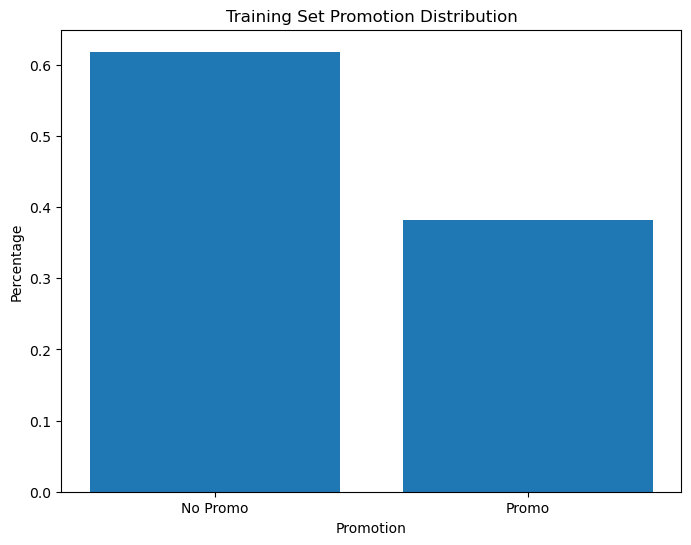

In [18]:
# Plotting the distribution of promotions in the training set
plt.figure(figsize=(8, 6))
plt.bar(train_promo_distribution.index, train_promo_distribution.values)
plt.title("Training Set Promotion Distribution")
plt.xlabel("Promotion")
plt.ylabel("Percentage")
plt.xticks(train_promo_distribution.index, ['No Promo', 'Promo'])
plt.show()

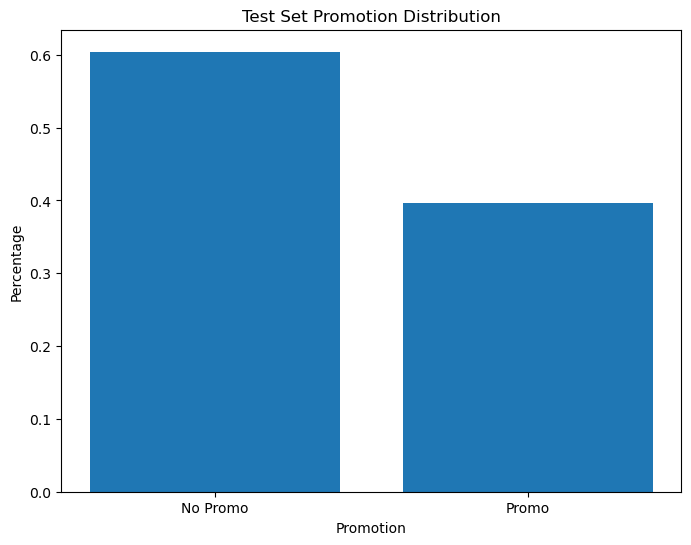

In [19]:
# Plotting the distribution of promotions in the test set
plt.figure(figsize=(8, 6))
plt.bar(test_promo_distribution.index, test_promo_distribution.values)
plt.title("Test Set Promotion Distribution")
plt.xlabel("Promotion")
plt.ylabel("Percentage")
plt.xticks(test_promo_distribution.index, ['No Promo', 'Promo'])
plt.show()

Check & compare sales behavior before, during, and after holidays

Using Train CSV

In [22]:
# Convert the 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [23]:
# Create a new column 'HolidayPeriod'
train_df['HolidayPeriod'] = 'Non-Holiday'

In [24]:
# Identify the sales behavior before, during, and after holidays
train_df.loc[train_df['StateHoliday'] != '0', 'HolidayPeriod'] = 'During Holiday'
train_df.loc[(train_df['StateHoliday'] == '0') & (train_df['StateHoliday'].shift(1) != '0'), 'HolidayPeriod'] = 'Before Holiday'
train_df.loc[(train_df['StateHoliday'] == '0') & (train_df['StateHoliday'].shift(-1) != '0'), 'HolidayPeriod'] = 'After Holiday'


In [25]:
# Calculate the average sales for each holiday period
average_sales_by_period = train_df.groupby('HolidayPeriod')['Sales'].mean()


HolidayPeriod
After Holiday     6970.543073
Before Holiday    6918.088683
During Holiday    4684.874237
Non-Holiday       5975.683664
Name: Sales, dtype: float64


In [26]:
# Print the average sales for each holiday period
print(average_sales_by_period)

HolidayPeriod
After Holiday     6970.543073
Before Holiday    6918.088683
During Holiday    4684.874237
Non-Holiday       5975.683664
Name: Sales, dtype: float64


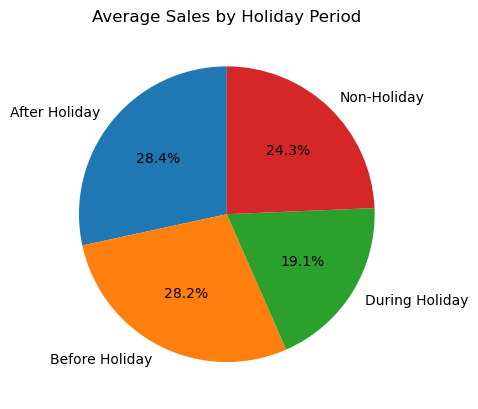

In [31]:
# Data for the pie chart
labels = average_sales_by_period.index
sizes = average_sales_by_period.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title("Average Sales by Holiday Period")

# Display the chart
plt.show()

●	Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

In [34]:
# Filter data for Christmas and Easter holidays
christmas_sales = train_df[train_df['StateHoliday'] == 'c']['Sales']
easter_sales = train_df[train_df['StateHoliday'] == 'b']['Sales']

In [35]:
# Calculate the average sales during Christmas and Easter
avg_christmas_sales = christmas_sales.mean()
avg_easter_sales = easter_sales.mean()


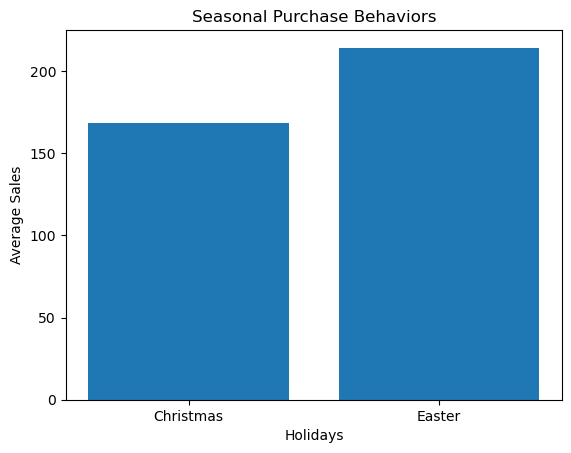

In [37]:
# Create a bar chart
holiday_labels = ['Christmas', 'Easter']
sales_data = [avg_christmas_sales, avg_easter_sales]

plt.bar(holiday_labels, sales_data)
plt.xlabel('Holidays')
plt.ylabel('Average Sales')
plt.title('Seasonal Purchase Behaviors')

# Show the plot
plt.show()

●	What can you say about the correlation between sales and the number of customers?
Based on the correlation value of 0.895, we can say that there is a strong positive correlation between sales and the number of customers. This means that as the number of customers increases, the sales also tend to increase. The correlation value of 0.895 suggests a strong linear relationship between these variables.

In [32]:
# Calculate the correlation between Sales and Customers
correlation = train_df['Sales'].corr(train_df['Customers'])

# Print the correlation value
print("Correlation between Sales and Customers:", correlation)

Correlation between Sales and Customers: 0.894710773301837


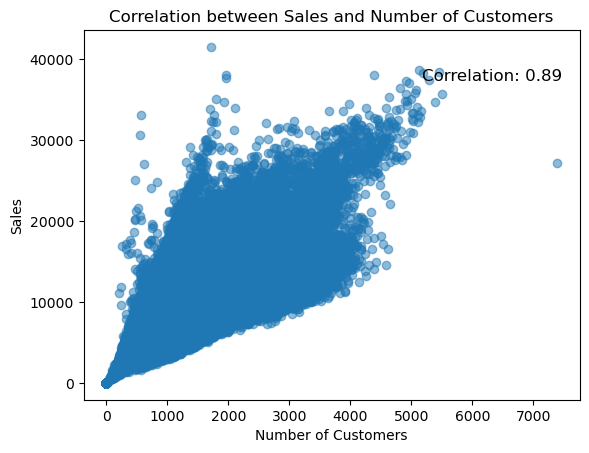

In [33]:
# Create a scatter plot
plt.scatter(train_df['Customers'], train_df['Sales'], alpha=0.5)
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.title('Correlation between Sales and Number of Customers')

# Add correlation value to the plot
plt.text(train_df['Customers'].max() * 0.7, train_df['Sales'].max() * 0.9,
         f'Correlation: {correlation:.2f}', fontsize=12)

# Show the plot
plt.show()

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

the average sales during promotional days (avg_sales_promo) are approximately 7991.15, while the average sales on non-promotional days (avg_sales_non_promo) are around 517.82. This suggests that promotions have a positive impact on sales, as the average sales during promos are significantly higher than on non-promo days.

In terms of attracting more customers, the average number of customers during promotional days (avg_customers_promo) is approximately 820.10, while the average number of customers on non-promotional days (avg_customers_non_promo) is approximately 517.82. This indicates that promotions do attract more customers, as the average number of customers during promos is higher than on non-promo days.

Therefore, based on the provided data, we can conclude  that promotions positively impact sales by attracting more customers. 

In [40]:
# Filter data for days with and without promotions
promo_days = train_df[train_df['Promo'] == 1]
non_promo_days = train_df[train_df['Promo'] == 0]

In [46]:
# Calculate the average sales and customers for promo and non-promo days
avg_sales_promo = promo_days['Sales'].mean()
avg_sales_non_promo = non_promo_days['Sales'].mean()

avg_customers_promo = promo_days['Customers'].mean()
avg_customers_non_promo = non_promo_days['Customers'].mean()

print("Average sales Promo :-",avg_sales_promo)
print("Average sales Non-Promo :-",avg_customers_non_promo)
print("Average Customers-Promo :-",avg_customers_promo)
print("Average Customers-Promo :-",avg_customers_non_promo)

Average sales Promo :- 7991.152045969903
Average sales Non-Promo :- 517.8235417537579
Average Customers-Promo :- 820.0988146773861
Average Customers-Promo :- 517.8235417537579


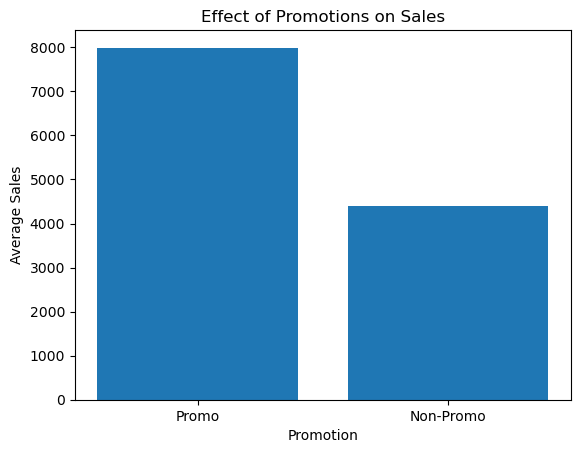

In [42]:
# Create a bar chart for average sales
sales_labels = ['Promo', 'Non-Promo']
sales_data = [avg_sales_promo, avg_sales_non_promo]

plt.bar(sales_labels, sales_data)
plt.xlabel('Promotion')
plt.ylabel('Average Sales')
plt.title('Effect of Promotions on Sales')

# Show the plot for average sales
plt.show()

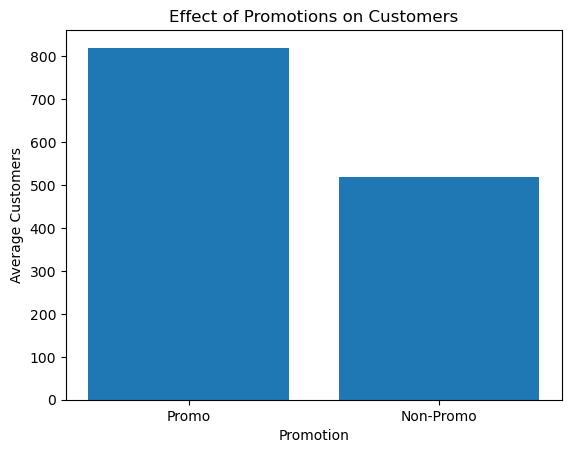

In [43]:
# Create a bar chart for average customers
customers_labels = ['Promo', 'Non-Promo']
customers_data = [avg_customers_promo, avg_customers_non_promo]

plt.bar(customers_labels, customers_data)
plt.xlabel('Promotion')
plt.ylabel('Average Customers')
plt.title('Effect of Promotions on Customers')

# Show the plot for average customers
plt.show()

●	Could the promos be deployed in more effective ways? Which stores should promos be deployed in?